In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2023-06-24 19:17:15.038517: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-24 19:17:15.040304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 19:17:15.073007: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 19:17:15.073793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 19:17:16.087227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
column_names = ['Sexo', 'Percentil', 'Edad', 'IMC']
raw_dataset = pd.read_csv("IMC_Varones_y_mujeres.csv", names=column_names, sep=',',skiprows=1)

In [3]:
dataset = raw_dataset.copy()
# dataset.tail()

df=raw_dataset.copy()

#filtered_df = df[(df['Sexo'] == 'M') & (df['Percentil'] == 97)]

filtered_df = df[(df['Edad'] < 5.5)]

filtered_df

Sexo  Percentil      Edad        IMC
0      V         97  5.118310  16.465448
15     V         85  5.118310  15.385226
30     V         75  5.124883  14.956315
45     V         25  5.118310  13.574266
60     V         10  5.105165  13.050041
75     V          3  5.124883  12.541698
90     M         97  5.125235  18.614898
105    M         85  5.125235  16.958847
120    M         75  5.118644  16.321905
136    M         50  5.184558  15.270949
151    M         25  5.131827  14.331459
166    M         10  5.118644  13.583050
181    M          3  5.164783  12.961782

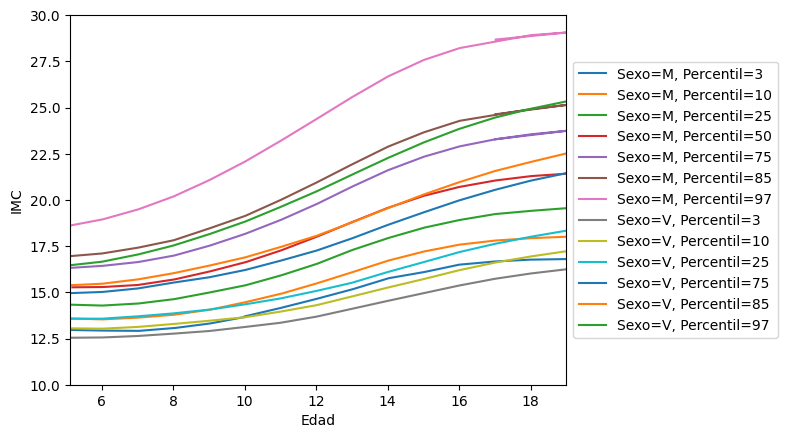

In [4]:
df=raw_dataset.copy()

# Define the x range a partir de valores únicos de edad (para pone en el eje x)
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create a figure and axes
fig, ax = plt.subplots()


# Iterate over each group and plot the data
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the axes, offset vertically by i
    ax.plot(x, y, label=f"Sexo={sexo}, Percentil={percentil}")

# Set the x-axis limits and labels
ax.set_xlim(x_range[0], x_range[-1])
ax.set_xlabel("Edad")

# Set the y-axis limits and label
ax.set_ylim(10, 30)

# Automatically set the y-axis limits based on the data range
#ax.autoscale(enable=True, axis='y')
ax.set_ylabel("IMC")

# Add a legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

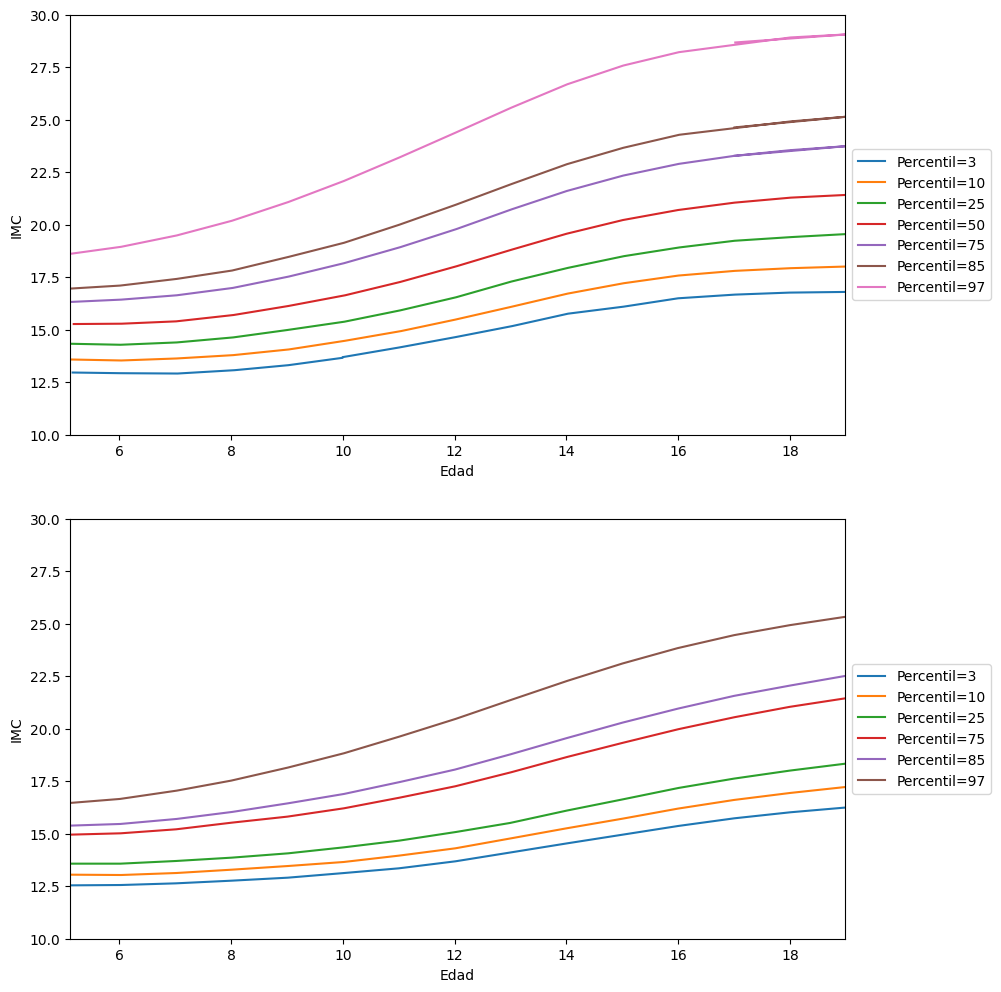

In [5]:

# Define the x range
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create two sets of axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Iterate over each group and plot the data on the appropriate axis
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the appropriate axis, offset vertically by i
    if sexo == 'M':
        ax1.plot(x, y, label=f"Percentil={percentil}")
    else:
        ax2.plot(x, y, label=f"Percentil={percentil}")

# Set the x-axis limits and labels for both plots
ax1.set_xlim(x_range[0], x_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])
ax1.set_xlabel("Edad")
ax2.set_xlabel("Edad")

# Set the y-axis limits and label for both plots
ax1.set_ylim(10, 30)
ax2.set_ylim(10, 30)
ax1.set_ylabel("IMC")
ax2.set_ylabel("IMC")

# Add a legend to each plot
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plots
plt.show()


In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Extraigo de los datos el resultado que espero obtener
train_labels = train_features.pop('Percentil').astype("float32")
test_labels = test_features.pop('Percentil').astype("float32")

print(type(train_labels))
print(type(test_labels))

test_labels.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


174    10.0
185     3.0
187     3.0
190     3.0
192     3.0
Name: Percentil, dtype: float32

In [8]:
# Normalizo tomando la última columna como referencia (pero normaliza todas)
normalizer = tf.keras.layers.Normalization(axis=-1)

In [9]:
# train_features['Sexo'] = train_features['Sexo'].map({1: 'M', 2: 'V'})

train_features = pd.get_dummies(train_features, columns = ['Sexo'], prefix='', prefix_sep='',dtype=int).astype("float32")

test_features = pd.get_dummies(test_features, columns = ['Sexo'], prefix='', prefix_sep='',dtype=int).astype("float32")

normalizer.adapt(np.array(train_features))

train_features.tail()

Edad        IMC    M    V
154   8.038607  14.634007  1.0  0.0
128  13.021658  20.732731  1.0  0.0
34    9.009390  15.814137  0.0  1.0
28   18.007511  22.057186  0.0  1.0
114  14.010358  22.882414  1.0  0.0

In [10]:
print(normalizer.mean.numpy())

[[11.841 17.906  0.551  0.449]]


In [11]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print("------------")
  # print('Normalized:', normalizer(first).numpy().astype("float32"))
  print('Normalized:', normalizer(first).numpy())

First example: [[10.02 19.14  1.    0.  ]]
------------
Normalized: [[-0.42  0.34  0.9  -0.9 ]]


In [12]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [13]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 64ms/step


array([[ 0.735],
       [-2.208],
       [ 2.727],
       [ 0.064],
       [ 2.098],
       [-2.197],
       [ 1.376],
       [ 2.09 ],
       [-0.063],
       [-2.248]], dtype=float32)

In [14]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 1.029],
       [-0.915],
       [ 0.965],
       [-0.666]], dtype=float32)>

In [15]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
train_labels.tail()

154    25.0
128    75.0
34     75.0
28     85.0
114    85.0
Name: Percentil, dtype: float32

In [16]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=400,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

train_features

CPU times: user 10.6 s, sys: 2.18 s, total: 12.7 s
Wall time: 9.64 s


Edad        IMC    M    V
110  10.022599  19.140375  1.0  0.0
12   17.001877  24.455917  0.0  1.0
178  17.016008  17.802795  1.0  0.0
74   19.006573  17.227959  0.0  1.0
149  18.017891  21.290058  1.0  0.0
..         ...        ...  ...  ...
154   8.038607  14.634007  1.0  0.0
128  13.021658  20.732731  1.0  0.0
34    9.009390  15.814137  0.0  1.0
28   18.007511  22.057186  0.0  1.0
114  14.010358  22.882414  1.0  0.0

[158 rows x 4 columns]

In [17]:
train_labels

110    85.0
12     97.0
178    10.0
74     10.0
149    50.0
       ... 
154    25.0
128    75.0
34     75.0
28     85.0
114    85.0
Name: Percentil, Length: 158, dtype: float32

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 70])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Percentil]')
  plt.legend()
  plt.grid(True)

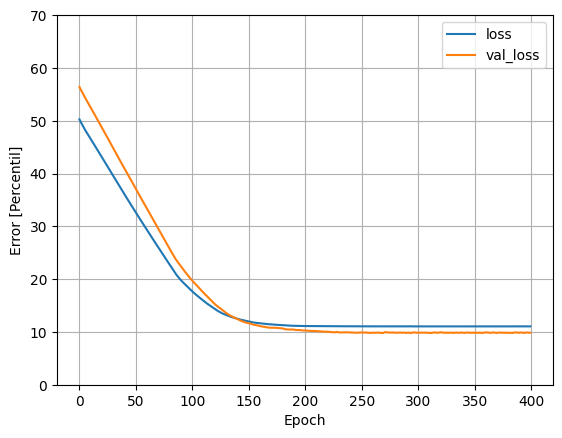

In [19]:
plot_loss(history)

In [20]:
#test_results = {}

test_results = linear_model.evaluate(
    test_features, test_labels, verbose=1)

test_results

2/2 [==============================] - 0s 4ms/step - loss: 10.3276


10.327564239501953

In [ ]:
linear_model.predict(test_features)

In [ ]:
test_features

In [ ]:
from tensorflow.keras.layers import Normalization

# Create a 3D tensor of shape (2, 3, 3)
input_data = tf.constant([
    [[1.0, 2.0, 3.0],
     [4.0, 5.0, 6.0],
     [7.0, 8.0, 9.0]],
    [[9.0, 8.0, 7.0],
     [6.0, 5.0, 4.0],
     [3.0, 2.0, 1.0]]
])

# Create a Normalization layer that normalizes along the last axis
normalizer = Normalization(axis=-1)

# Adapt the Normalization layer to the input data
normalizer.adapt(input_data)

# Normalize the input data using the Normalization layer
normalized_data = normalizer(input_data)

# Print the normalized data
print(normalized_data)